In [15]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,2022,12,4,...,1,0,0,0,0,0,1,1,0,0


In [6]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

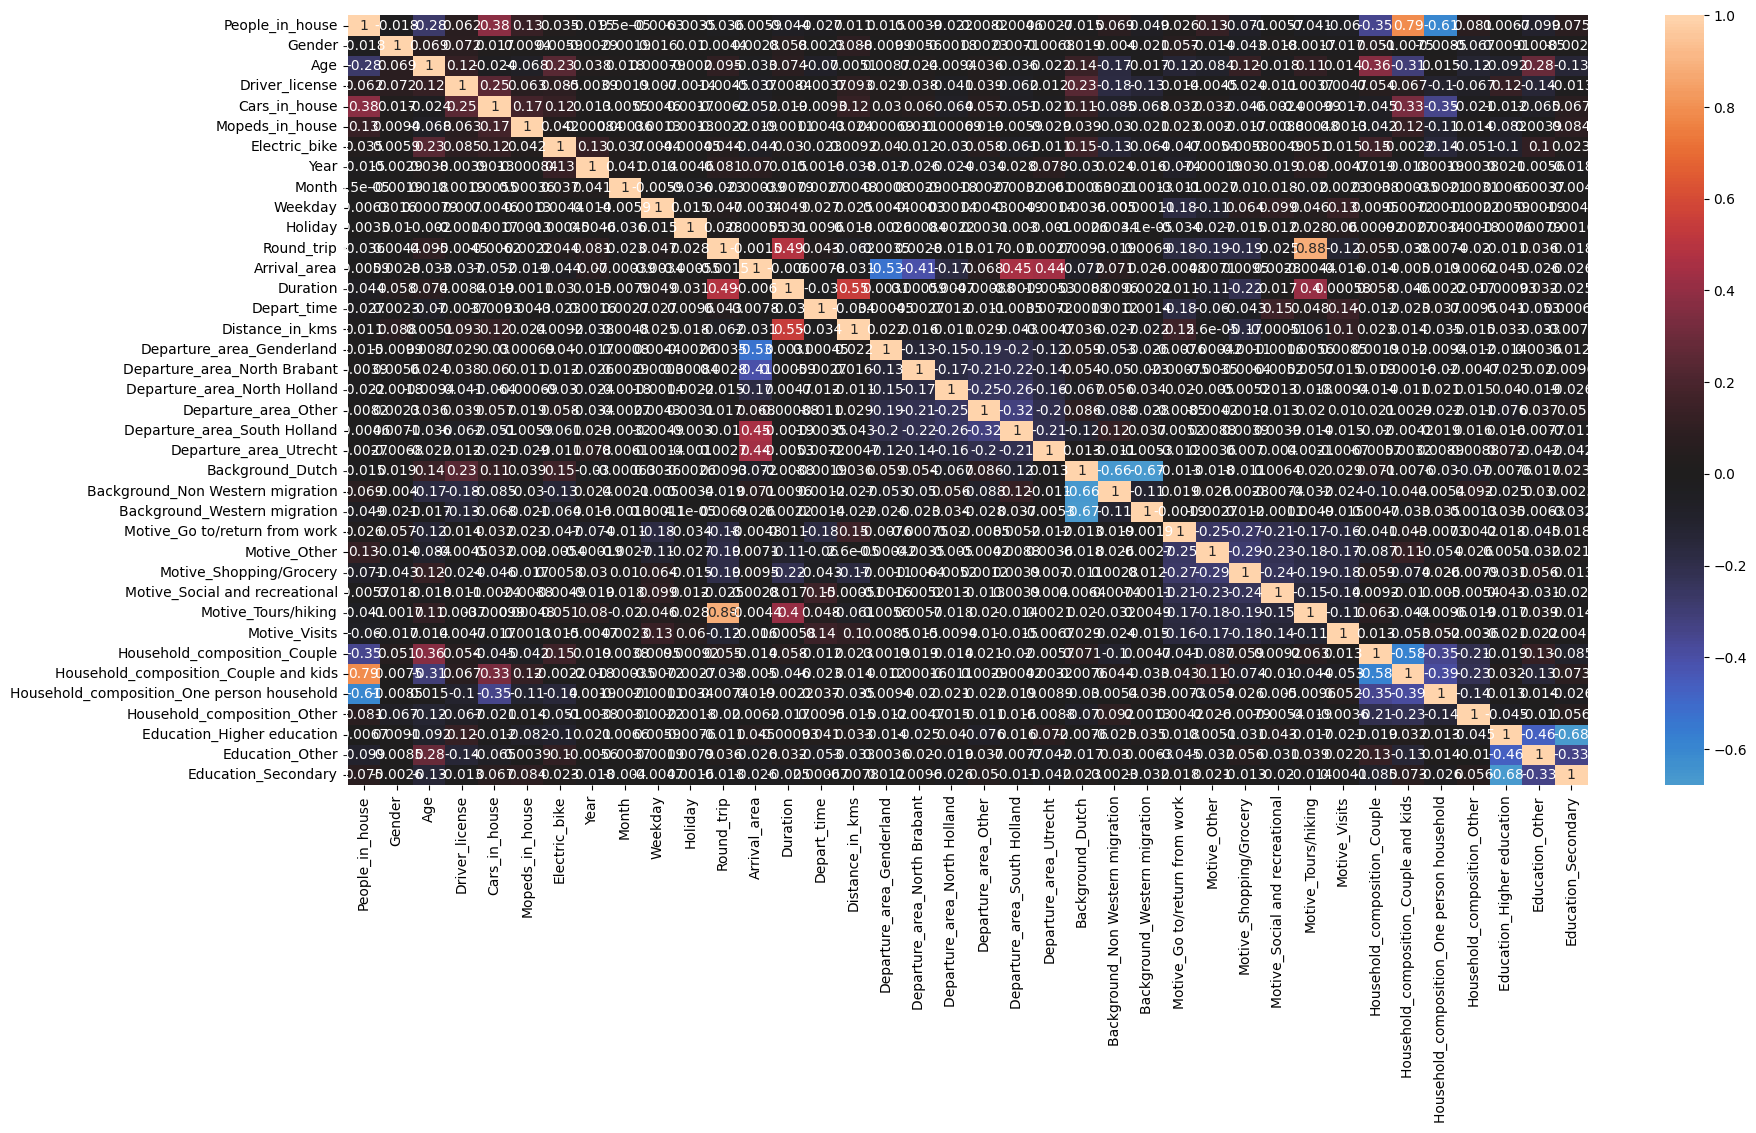

In [7]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

# 4 labels: Car, Bike, Walk, Public Trasport

In [6]:
drops = ["Mode", "Arrival_area", "Year", "Motive_Tours/hiking", "Household_composition_Couple and kids",
        'Education_Secondary', 'Background_Non Western migration', 'Departure_area_Other', 'Motive_Shopping/Grocery']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [7]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Background_Western migration,Motive_Go to/return from work,Motive_Other,Motive_Social and recreational,Motive_Visits,Household_composition_Couple,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,1,0,1,0,0,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,1,1,0
692051,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,0,1,1,0
692052,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,0,1,1,0
692053,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,1,1,0


In [8]:
X, y = shuffle(X, y, random_state=42)

In [9]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Background_Western migration,Motive_Go to/return from work,Motive_Other,Motive_Social and recreational,Motive_Visits,Household_composition_Couple,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other
450271,2,0,59,1,1,0,1,5,3,0,...,0,1,0,0,0,1,0,0,1,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,0,0,1,1,0,0,0,1
74133,3,1,55,1,3,1,0,6,4,0,...,0,1,0,0,0,0,0,0,0,0
343899,2,0,62,1,1,0,0,8,1,0,...,1,0,1,0,0,1,0,0,1,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,0,0,0,1,0,1,0,0,1,0
365838,2,1,42,1,0,0,0,9,4,0,...,1,1,0,0,0,1,0,0,1,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,1,0,0,1,0,0,0,0
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [11]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    285384
1    159141
2    156174
3     22150
Name: count, dtype: int64

Class counts in y_test:
Mode
0    31710
1    17682
2    17353
3     2461
Name: count, dtype: int64


In [12]:
X_train.shape, X_test.shape

((622849, 30), (69206, 30))

# Logistic Regression

In [16]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomOverSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [17]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__max_iter': 400, 'classifier__solver': 'lbfgs'}


In [18]:
score = grid_search_log.best_score_
score

0.5744937019110904

In [19]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     31710
           1       0.54      0.46      0.50     17682
           2       0.74      0.82      0.78     17353
           3       0.16      0.65      0.26      2461

    accuracy                           0.66     69206
   macro avg       0.58      0.66      0.58     69206
weighted avg       0.73      0.66      0.69     69206



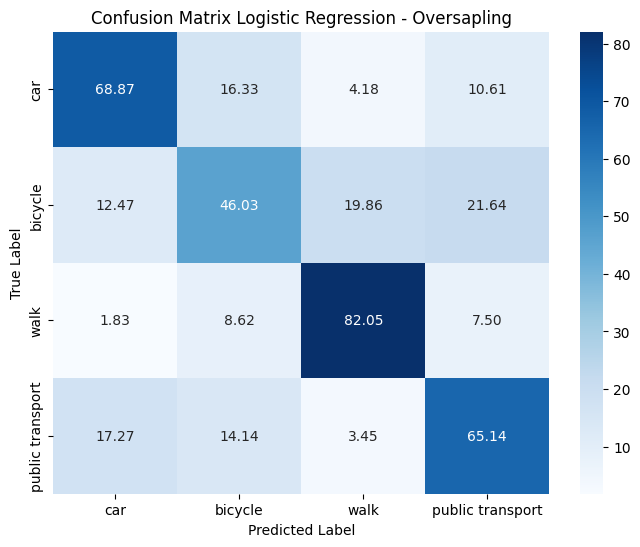

In [20]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Oversapling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

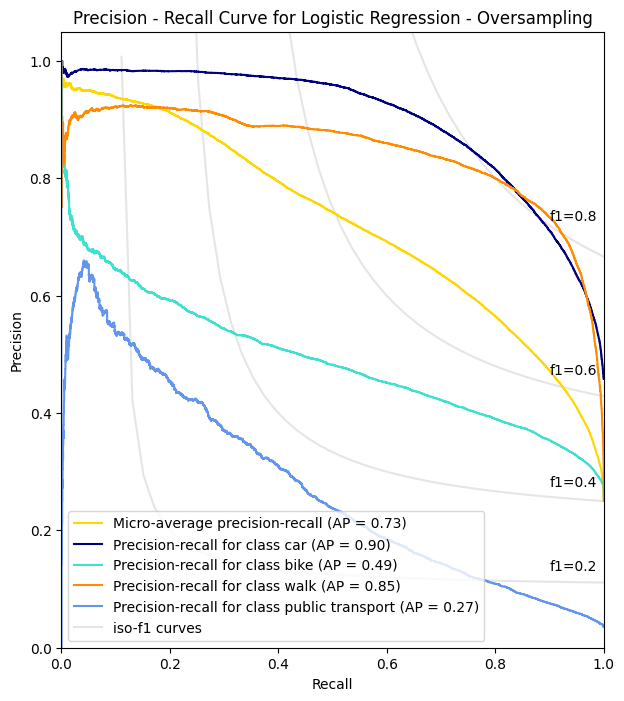

In [22]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Oversampling")

plt.show()

# Decision Tree

In [24]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [25]:
param_grid = {
    'classifier__max_depth': list(range(2, 17)),
}

In [26]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16]},
             scoring='f1_macro')

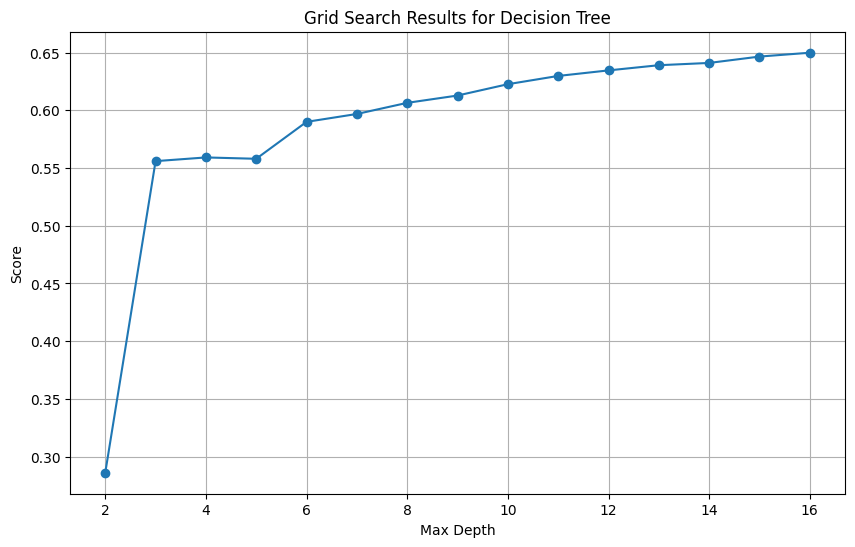

In [28]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [29]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [30]:
best_params

{'classifier__max_depth': 16}

In [31]:
score = grid_search.best_score_
score

0.6498174192245122

In [32]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.92      0.70      0.80     31710
           1       0.58      0.70      0.63     17682
           2       0.84      0.84      0.84     17353
           3       0.24      0.65      0.35      2461

    accuracy                           0.73     69206
   macro avg       0.65      0.72      0.65     69206
weighted avg       0.79      0.73      0.75     69206



In [33]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other'],
      dtype='object')

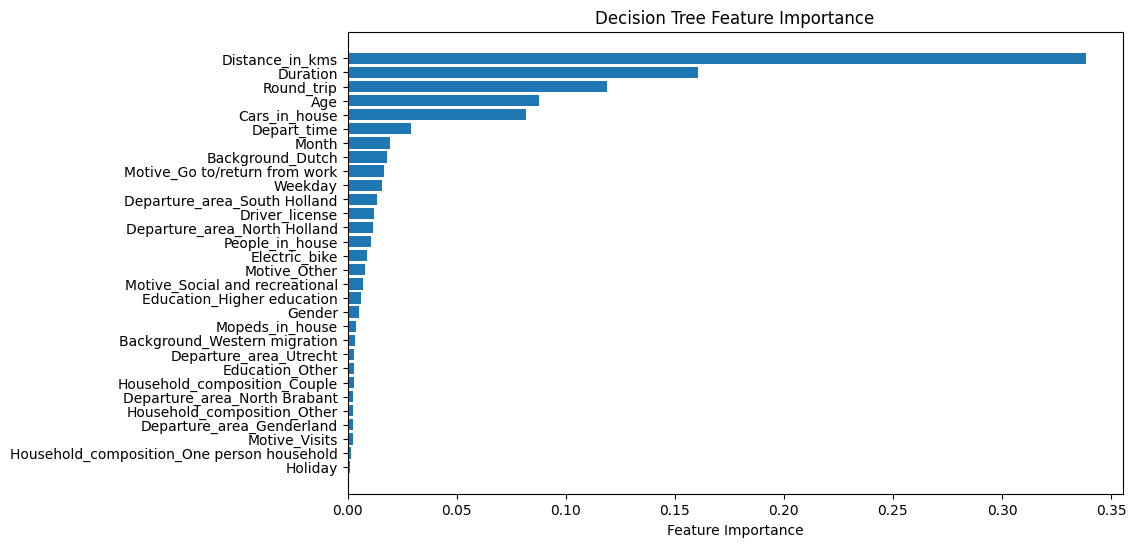

In [34]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

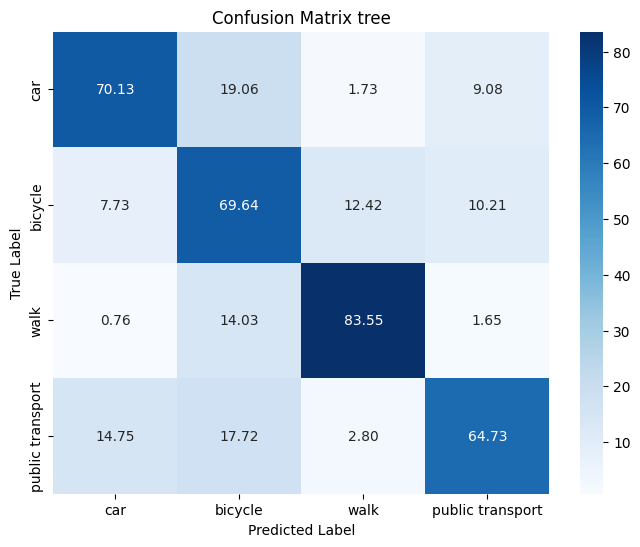

In [35]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

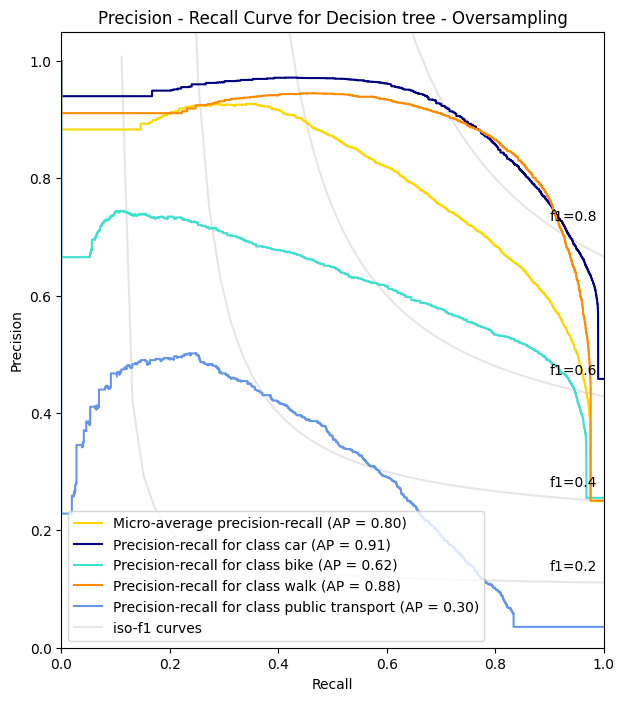

In [37]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Oversampling")

plt.show()

# Random Forest

In [38]:
X.shape

(692055, 30)

In [21]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [15]:
param_grid = {
    'classifier__max_features' : list(range(2, 11))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
             scoring='f1_macro')

In [16]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 4}


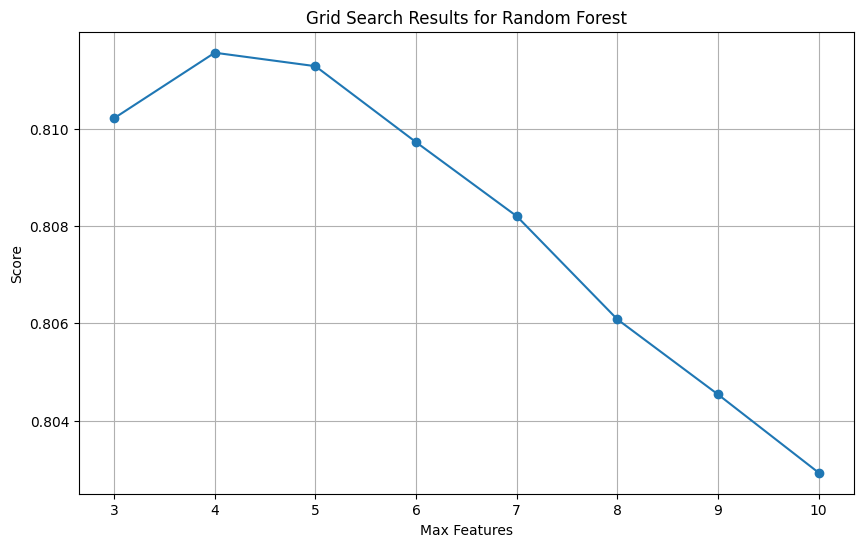

In [17]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [15]:
param_grid = {
    'classifier__n_estimators' : [450, 500, 550],
    'classifier__max_features' : [4]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)
best_params = grid_search_rf.best_params_

In [17]:
best_params

{'classifier__max_features': 4, 'classifier__n_estimators': 550}

In [16]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     31710
           1       0.82      0.83      0.83     17682
           2       0.89      0.93      0.91     17353
           3       0.79      0.56      0.66      2461

    accuracy                           0.89     69206
   macro avg       0.86      0.81      0.83     69206
weighted avg       0.89      0.89      0.89     69206



In [18]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple', 'Household_composition_Other',
       'Education_Higher education', 'Education_Other'],
      dtype='object')

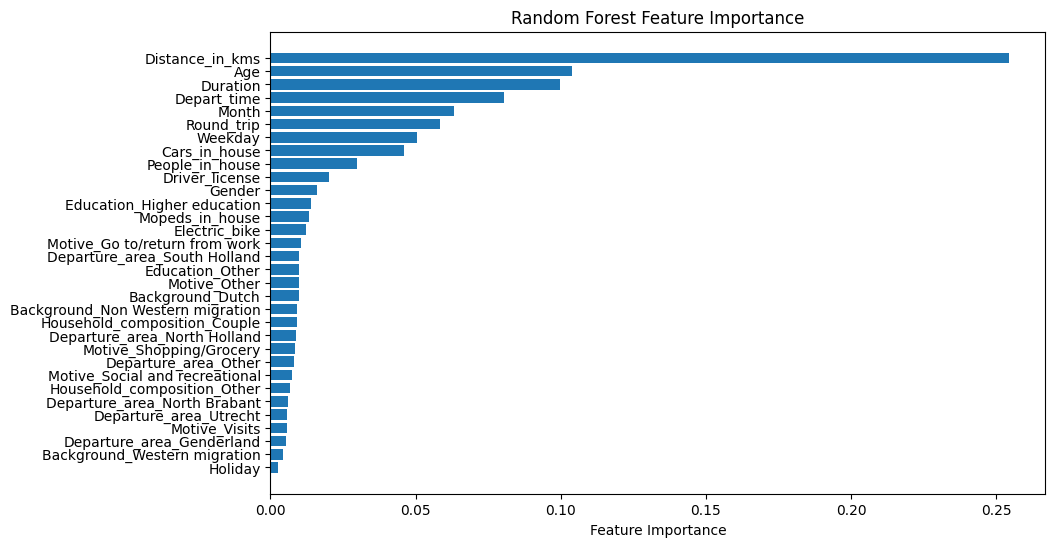

In [19]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple', 'Household_composition_Other',
       'Education_Higher education', 'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

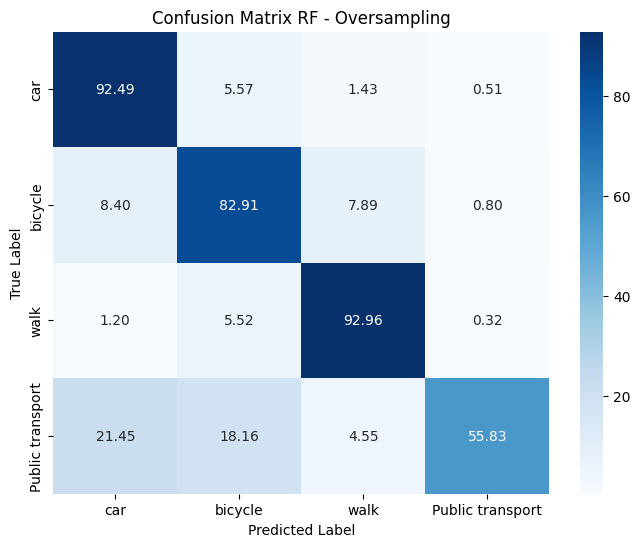

In [24]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

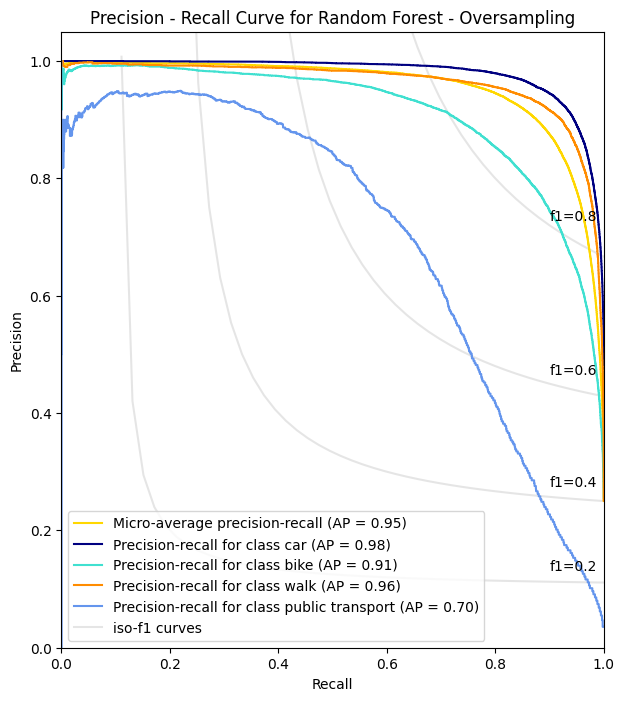

In [25]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Oversampling")

plt.show()

# XGBoost

In [40]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [41]:
param_grid = {
    'classifier__colsample_bytree' : [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_pol...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                          0.8, 0.9, 1]},
             scoring='f1_macro')

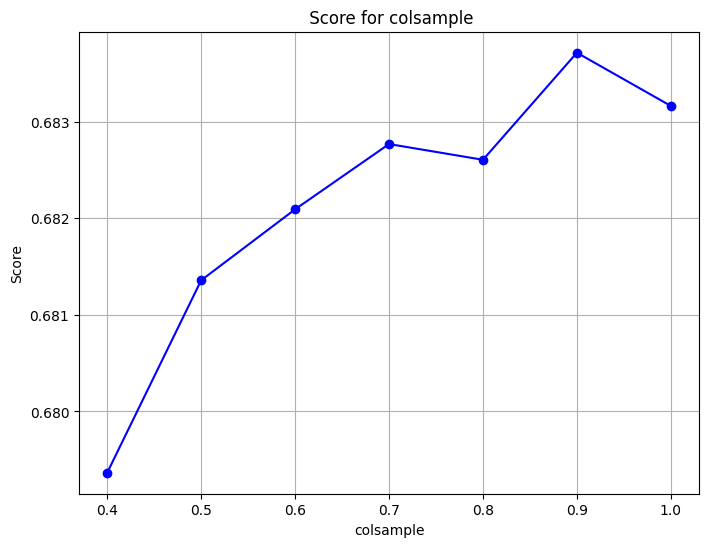

In [42]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [43]:
param_grid = {
    'classifier__subsample' : [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_pol...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                   1]},
             scoring='f1_macro')

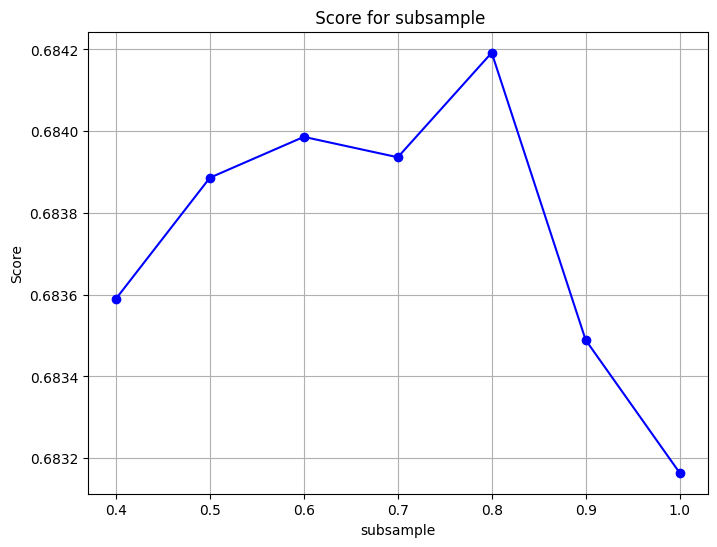

In [44]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [45]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

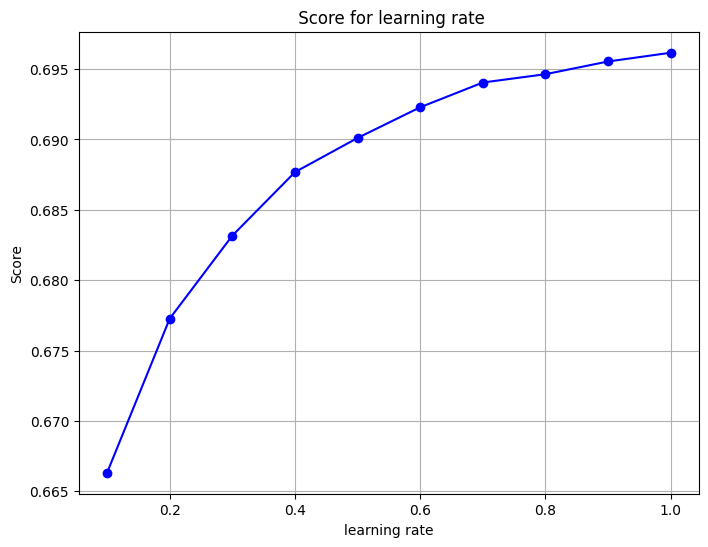

In [46]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [47]:
param_grid = {
    'classifier__learning_rate' : [0.9, 1],
    'classifier__subsample' : [0.8], 
    'classifier__n_estimators' : [450, 550],
    'classifier__colsample_bytree' : [0.9]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.9, 'classifier__learning_rate': 0.9, 'classifier__n_estimators': 550, 'classifier__subsample': 0.8}


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     31710
           1       0.66      0.75      0.70     17682
           2       0.85      0.87      0.86     17353
           3       0.44      0.63      0.52      2461

    accuracy                           0.80     69206
   macro avg       0.72      0.76      0.73     69206
weighted avg       0.82      0.80      0.81     69206



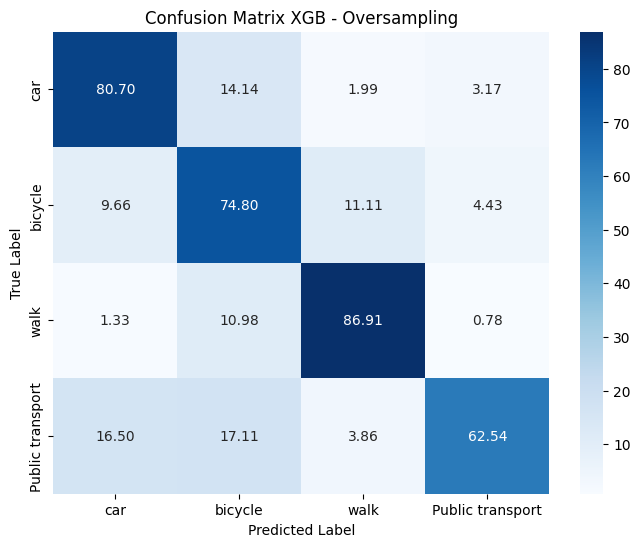

In [49]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB - Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

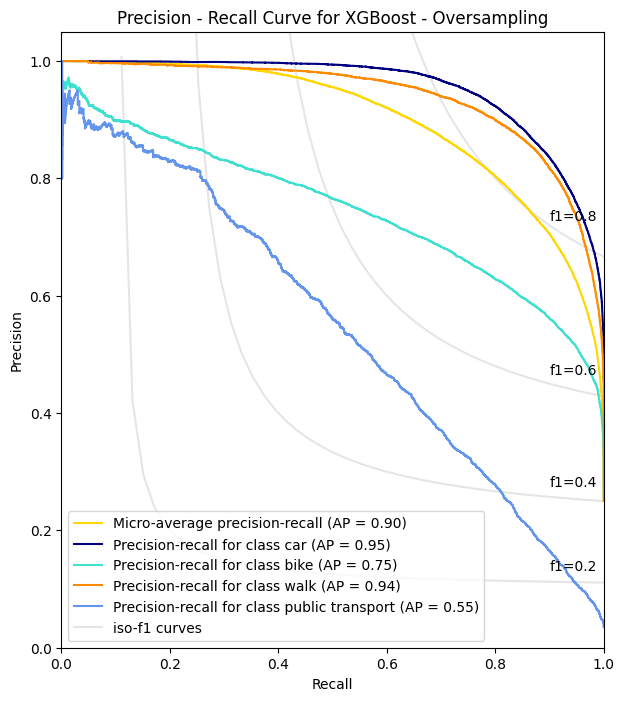

In [50]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Oversampling")

plt.show()

In [51]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other'],
      dtype='object')

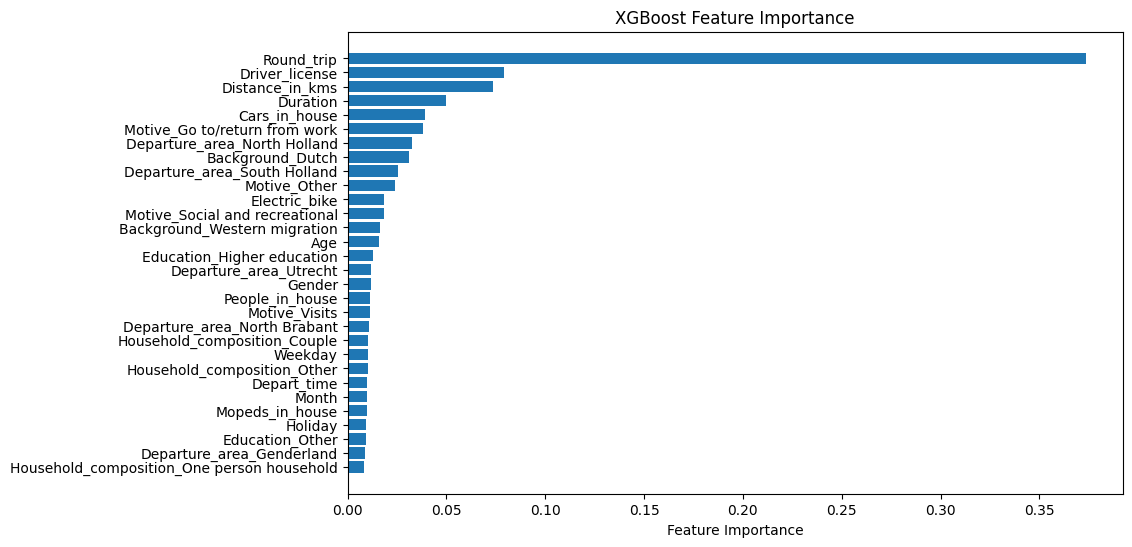

In [52]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()